<a href="https://colab.research.google.com/github/fThAbhishek-Pandey/plagementPreduction/blob/main/placementPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Check the existence of the file
!ls /content/placement.csv

# Display file details
!ls -l /content/placement.csv

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/placement.csv')


/content/placement.csv
-rw-r--r-- 1 root root 1485 Mar 29 10:28 /content/placement.csv


In [11]:
df = pd.read_csv('/content/placement.csv')

In [12]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df=df.iloc[:,1:]

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [15]:
df.shape

(100, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [18]:
df= df.iloc[:,1:]  #preprocessing

In [19]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


steps
1. preprocess --> EDA --> feature selection
2. Extract input and output cols
3. scale the value
4. train test split
5. train the model
6. evaluate the model/ model selection
7. deploy the model

In [28]:
import matplotlib.pyplot as plt

In [29]:
c = 'blue'

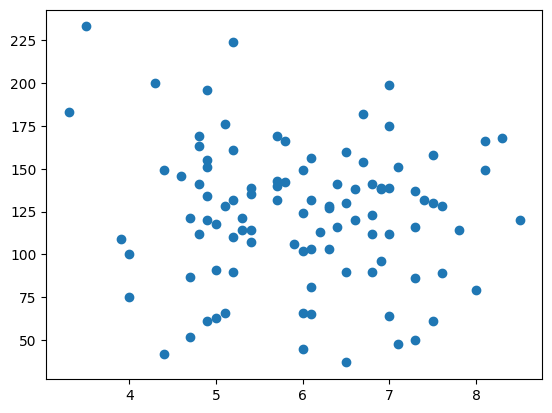

In [34]:
plt.scatter(df['cgpa'],df['iq'])

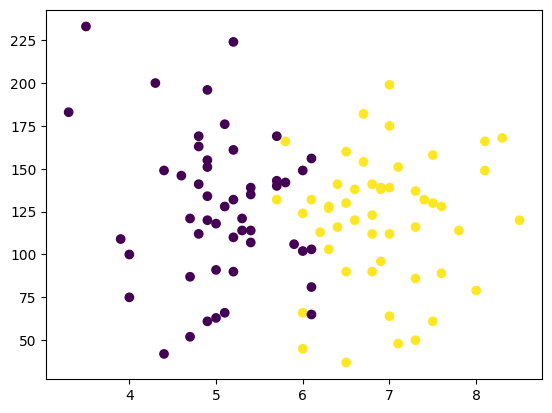

In [37]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

**logestic regression **

Extract input and output **cols**

In [38]:
x= df.iloc[:,0:2]
y= df.iloc[:,-1]

In [39]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [40]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [41]:
x.shape

(100, 2)

In [42]:
y.shape

(100,)

train the model

In [46]:
from sklearn.model_selection import train_test_split
train_test_split(x,y,test_size=0.1)

[    cgpa     iq
 23   4.7   87.0
 20   6.6  120.0
 81   5.4  107.0
 73   4.9   61.0
 74   6.7  154.0
 ..   ...    ...
 11   6.9  138.0
 71   6.1  132.0
 98   6.3  103.0
 12   5.4  139.0
 34   4.8  163.0
 
 [90 rows x 2 columns],
     cgpa     iq
 93   6.8  112.0
 35   6.8   90.0
 80   4.9  196.0
 17   3.3  183.0
 19   5.2  132.0
 36   5.7  140.0
 2    5.3  121.0
 55   7.8  114.0
 24   4.7  121.0
 8    6.1  156.0,
 23    0
 20    1
 81    0
 73    0
 74    1
      ..
 11    1
 71    1
 98    1
 12    0
 34    0
 Name: placement, Length: 90, dtype: int64,
 93    1
 35    1
 80    0
 17    0
 19    0
 36    0
 2     0
 55    1
 24    0
 8     0
 Name: placement, dtype: int64]

store in variable

In [45]:
x_train , x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

print one by one

In [47]:
x_train

,cgpa,iq
15,5.1,176.0
27,6.0,124.0
84,5.7,169.0
85,5.8,166.0
41,5.4,114.0
...,...,...
77,7.3,50.0
31,3.9,109.0
6,5.7,143.0
30,7.6,128.0


In [48]:
x_test

,cgpa,iq
95,4.3,200.0
22,4.9,120.0
40,4.9,134.0
96,4.4,42.0
9,5.1,66.0
47,5.2,161.0
16,5.2,224.0
82,6.5,37.0
78,6.1,81.0
39,4.6,146.0


In [49]:
y_test

95    0
22    0
40    0
96    0
9     0
47    0
16    0
82    1
78    0
39    0
Name: placement, dtype: int64

In [50]:
y_train

15    0
27    1
84    0
85    1
41    0
     ..
77    1
31    0
6     0
30    1
45    1
Name: placement, Length: 90, dtype: int64

scaling

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
x_train= scaler.fit_transform(x_train)

In [54]:
x_train

array([[-0.86776155,  1.42375109],
       [-0.07711267,  0.00394391],
       [-0.34066229,  1.2326232 ],
       [-0.25281242,  1.15071125],
       [-0.60421192, -0.26909593],
       [ 0.53783646,  1.587575  ],
       [-1.13131117,  1.2326232 ],
       [ 1.50418509, -0.26909593],
       [-1.48271067,  0.68654352],
       [-0.95561142, -0.15988   ],
       [ 0.18643696,  0.11315985],
       [-1.83411018, -1.33395132],
       [-0.60421192,  0.30428774],
       [ 1.24063546, -1.7162071 ],
       [ 1.15278559,  0.22237578],
       [-1.83411018, -0.65135171],
       [ 0.18643696, -0.56943976],
       [ 0.71353621,  0.38619969],
       [ 0.62568633, -0.92439156],
       [-1.21916105, -1.00630351],
       [ 0.62568633,  0.46811164],
       [ 0.01073721, -1.60699116],
       [ 0.88923596,  0.74115148],
       [-1.0434613 ,  0.85036742],
       [-1.13131117,  1.0687993 ],
       [ 0.80138609, -1.63429515],
       [ 0.80138609, -0.3237039 ],
       [ 1.24063546,  0.93227937],
       [-0.77991167,

In [55]:
x_test= scaler.transform(x_test)

In [56]:
x_test

array([[-1.57056055,  2.07904671],
       [-1.0434613 , -0.10527203],
       [-1.0434613 ,  0.27698375],
       [-1.48271067, -2.2349828 ],
       [-0.86776155, -1.57968718],
       [-0.77991167,  1.01419133],
       [-0.77991167,  2.73434234],
       [ 0.36213671, -2.37150272],
       [ 0.01073721, -1.17012742],
       [-1.30701092,  0.60463156]])

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf = LogisticRegression()

In [60]:
#model trainning
clf.fit(x_train,y_train)

LogisticRegression()

evaluate


In [64]:
 y_pred = clf.predict(x_test)

In [65]:
y_test

95    0
22    0
40    0
96    0
9     0
47    0
16    0
82    1
78    0
39    0
Name: placement, dtype: int64

Check accurecy

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,y_pred)

0.9

In [69]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

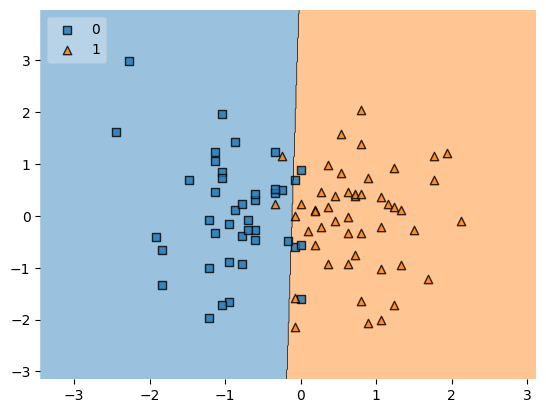

In [70]:
plot_decision_regions(x_train,y_train.values, clf= clf , legend=2)

In [71]:
import pickle

In [73]:
pickle.dump(clf, open('model.pkl','wb'))